(42000, 785)


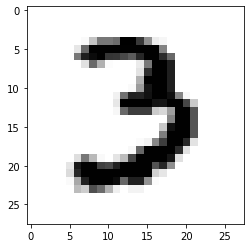

In [24]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Splitting Process

from sklearn.model_selection import train_test_split

# Training Process

from sklearn.linear_model import SGDClassifier


# Performance Measures 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


mnist_train = pd.read_csv("train.csv")
mnist_test  = pd.read_csv("test.csv")

#Take copies of the master dataframes

train = mnist_train.copy()
test = mnist_test.copy()
train.shape
test.shape
X, y = train.drop(labels = ["label"],axis = 1), train["label"]
X.shape
array=X.values
some_digit = array[9]
some_digit_show = plt.imshow(array[9].reshape(28,28), cmap=mpl.cm.binary)
y[9]
print(train.shape)


3

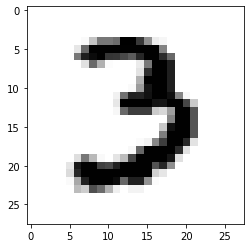

In [26]:
array=X.values
some_digit = array[9]
some_digit_show = plt.imshow(array[9].reshape(28,28), cmap=mpl.cm.binary)
y[9]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,y_test_3.shape,type(y_test_3))

(37800, 784) (4200, 784) (37800,) (4200,) (4200,) <class 'pandas.core.series.Series'>


In [33]:
sgd_clf = SGDClassifier(max_iter=1000,random_state = 42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
sgd_clf.predict([some_digit])

array([ True])

In [35]:
sgd_clf.predict([array[4]])

array([False])

In [39]:
y_pred=sgd_clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [40]:
confusion_matrix(y_test_3.values,y_pred)

array([[3666,   28],
       [ 145,  361]], dtype=int64)

In [43]:
predictions_sgd = sgd_clf.predict(X_test)
print(predictions_sgd[10])

accuracy_score(y_test_3.values,y_pred)

False


0.9588095238095238

In [44]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
sgd_clf_multi = SGDClassifier(max_iter=1000,random_state = 42)
sgd_clf_multi.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
y_pred2 = sgd_clf_multi.predict(X_test)

In [47]:
y_pred2

array([8, 1, 9, ..., 7, 7, 5], dtype=int64)

In [48]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
16041    4
4867     2
28123    7
3780     7
7155     5
Name: label, Length: 4200, dtype: int64

In [49]:
type(y_test)

pandas.core.series.Series

In [50]:
y_test.values

array([8, 1, 9, ..., 7, 7, 5], dtype=int64)

In [51]:
y_test.values[0]

8

In [52]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y_test[3:6] #Now we access the element of series using index operator [ ].

# using indexing operator

31803    9
39863    8
30639    6
Name: label, dtype: int64

In [54]:
y_test[0:8] 

5457     8
38509    1
25536    9
31803    9
39863    8
30639    6
12986    2
41067    2
Name: label, dtype: int64

In [55]:
#y_train_pred2 = cross_val_predict(sgd_clf, X_train, y_train, cv= 3)
confusion_matrix(y_test, y_pred2)

array([[401,   0,   2,   0,   0,   0,   3,   0,   2,   0],
       [  0, 454,   9,   0,   0,   0,   1,   1,   5,   1],
       [  5,   1, 380,   3,  11,   2,   4,   4,  10,   0],
       [  4,   1,  38, 419,   2,  15,   1,   6,   7,  13],
       [  1,   3,   1,   0, 363,   2,   1,   5,   3,  18],
       [ 15,   3,   5,  21,   8, 259,   8,   1,  13,   6],
       [  7,   0,   8,   1,   7,   8, 367,   0,   3,   1],
       [  3,   0,   8,   2,   7,   0,   1, 397,   3,  17],
       [  3,   9,  18,  25,   9,  23,   0,   2, 297,  17],
       [  7,   2,   1,  10,  23,   1,   0,  22,   1, 349]], dtype=int64)

In [56]:
accuracy_score(y_test, y_pred2)

0.8776190476190476